# Preliminaries
Run the next 3 cells to load the data, this might take while.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# ! pip install git+ssh://git@github.com/niekheinen/research_project_2020.git
! pip install wfdb
! rm *.py
! cp "/content/drive/My Drive/ECG_Classifier/load_data.py" .
! cp "/content/drive/My Drive/ECG_Classifier/signal_reshaper.py" .
! cp "/content/drive/My Drive/ECG_Classifier/evaluate.py" .



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import datetime
import itertools
import wfdb
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix

import evaluate
import signal_reshaper as sr
import load_data as ld

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import load_model

In [ ]:
data = ld.load_data('/content/drive/My Drive/ECG_Classifier/mitdb/')

Loading beats took: 17.7s
105368
(49625, 36, 36, 3)
Reshaping the signals took: 154.5s


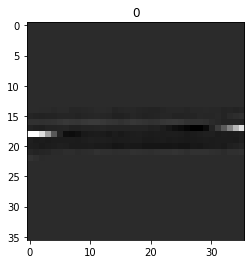

In [ ]:
tensor = data['tests'][0][20]
evaluate.vizualise_tensor(tensor, data['tests'][1][20])


# Train Networks

In [ ]:
net = tf.keras.applications.ResNet50V2(
    input_shape=(36,36,3,),
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    pooling='max',
)

for layer in net.layers:
    layer.trainable = False

x = net.output
# x = GlobalAveragePooling2D()(x)
# x = Dense(128, activation= 'relu')(x)
# x = Dense(64, activation= 'relu')(x)
predictions = Dense(5, activation='softmax')(x)
model = Model(inputs=net.input, outputs=predictions)
# model.summary()
model.compile(optimizer=keras.optimizers.Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(data['train'][0], data['train'][1], epochs=30, verbose = 2)

Epoch 1/30
1607/1607 - 38s - loss: 4.6757 - accuracy: 0.8959
Epoch 2/30
1607/1607 - 37s - loss: 3.2940 - accuracy: 0.9197
Epoch 3/30
1607/1607 - 38s - loss: 3.7441 - accuracy: 0.9229
Epoch 4/30
1607/1607 - 38s - loss: 3.8146 - accuracy: 0.9290
Epoch 5/30
1607/1607 - 38s - loss: 3.2995 - accuracy: 0.9334
Epoch 6/30


In [ ]:
model.save("/content/drive/My Drive/ECG_Classifier/models/ResNet50_ba.h5")

In [ ]:

! ls "/content/drive/My Drive/ECG_Classifier/models"

MobileNetV2_small.h5  ResNet50_ba_1tl.h5  ResNet50_small_V1.h5


In [ ]:
model = load_model("/content/drive/My Drive/Colab Notebooks/MobileNetV2_1_88.h5")

In [ ]:
evaluate.evaluate_model(model, data['tests'][0], data['tests'][1], keras_evaluation=True)